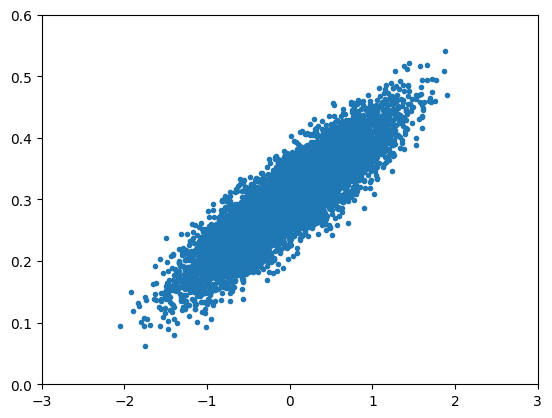

In [1]:
# %%
import torch
from torch import nn
from torch import optim
from matplotlib import pyplot as plt

W = 0.1
B = 0.3

x = torch.normal(0.0, 0.55, (10000, 1))
y = x * W + B + torch.normal(0.0, 0.03, (10000,1))
plt.plot(x, y, ".")
plt.xlim(-3, 3)
plt.ylim(0, 0.6)
plt.show()

Initial parameters
W: -0.459, B: 0.663


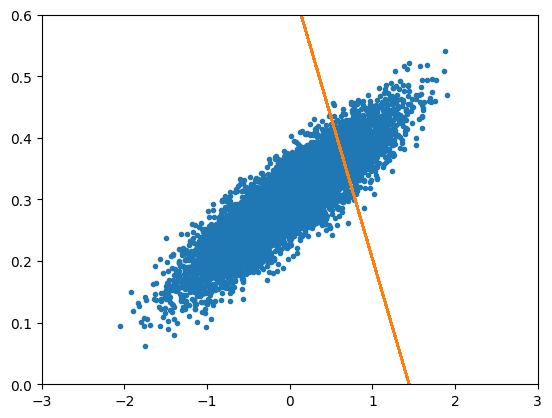

In [2]:
# class Model(nn.Module):
#     def __init__(self):
#         super(Model, self).__init__()
#         self.linear = nn.Linear(1, 1)

#     def forward(self, X):
#         X = self.linear(X)
#         return X

model = nn.Linear(1, 1)
param = list(model.parameters())     
print(f"Initial parameters")
print(f"W: {param[0].item():.3f}, B: {param[1].item():.3f}")

y_pred = param[0].detach() * x + param[1].detach()
plt.plot(x, y, ".")
plt.plot(x, y_pred)
plt.xlim(-3, 3)
plt.ylim(0, 0.6)
plt.show()

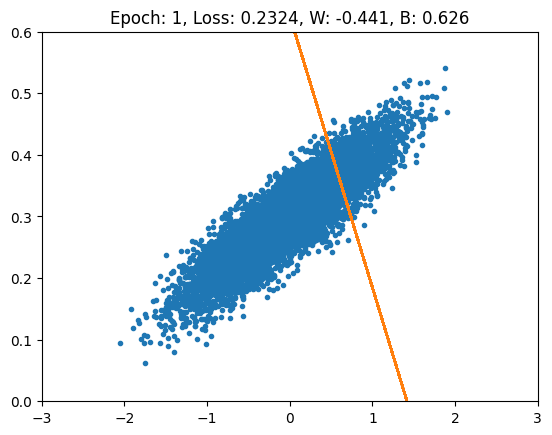

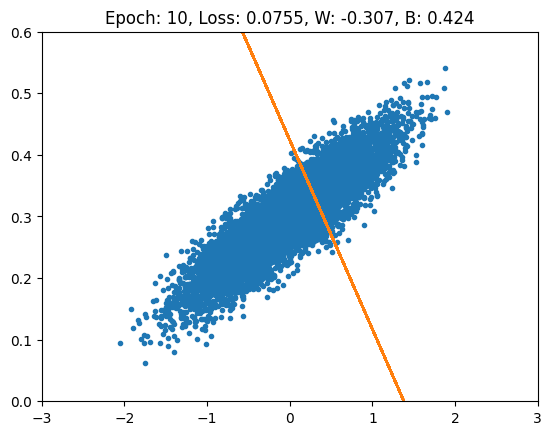

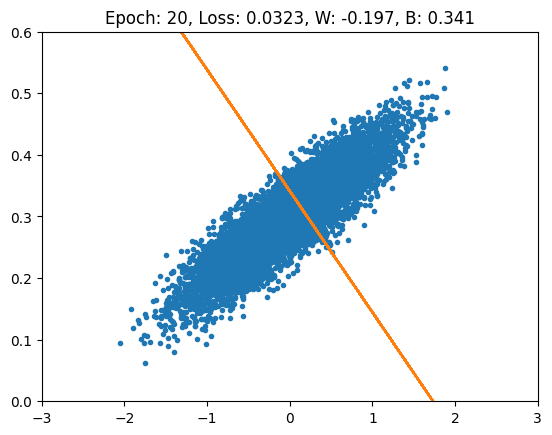

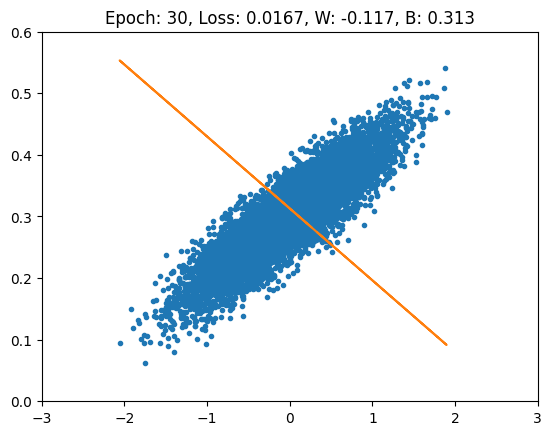

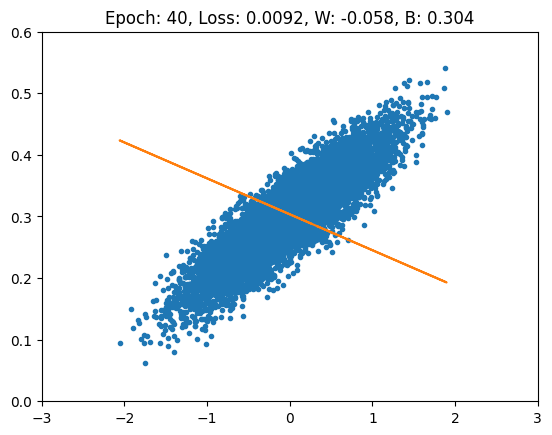

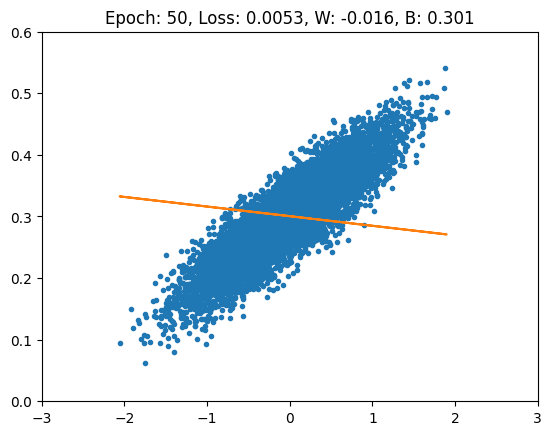

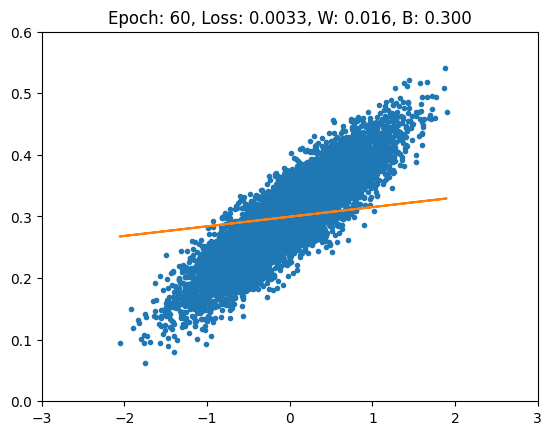

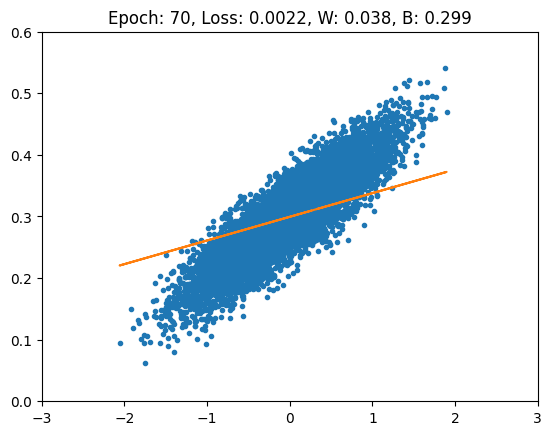

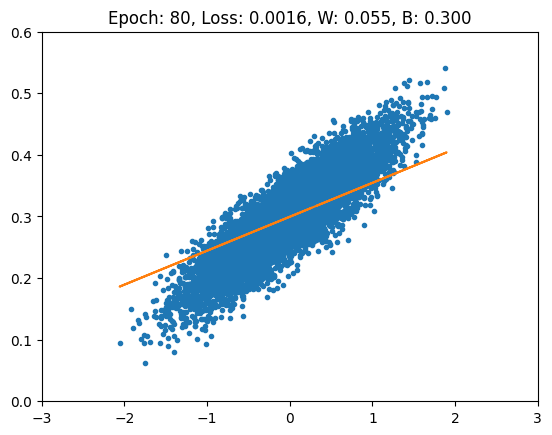

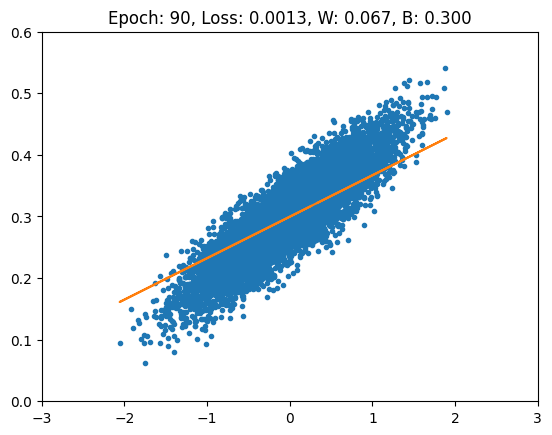

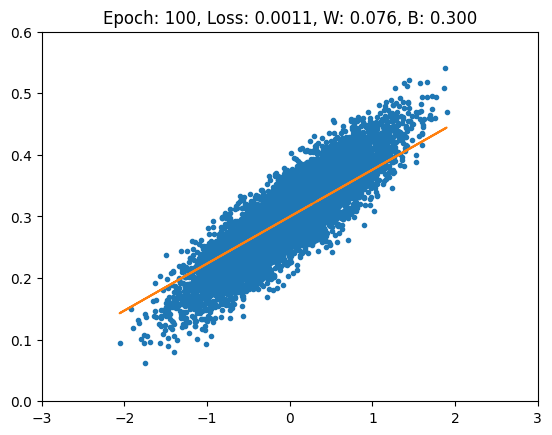

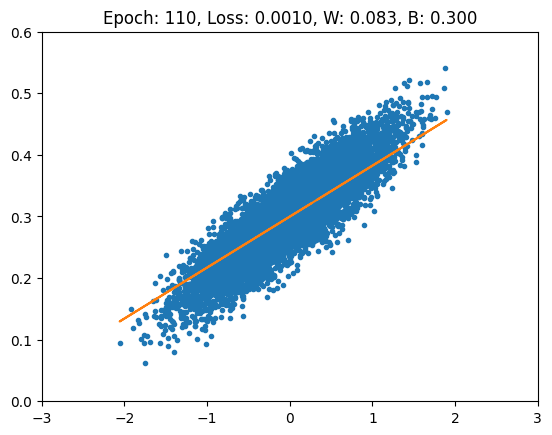

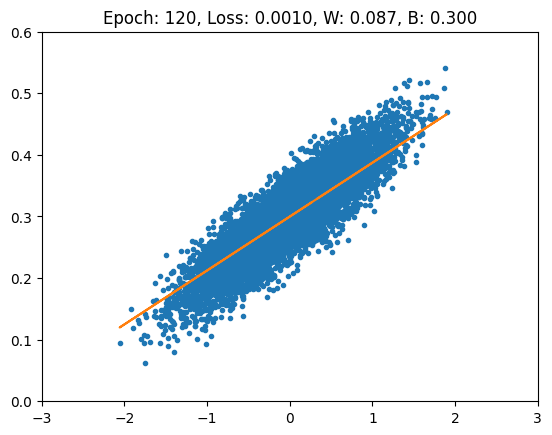

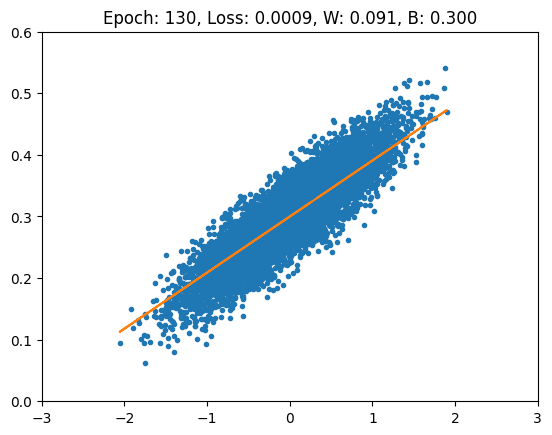

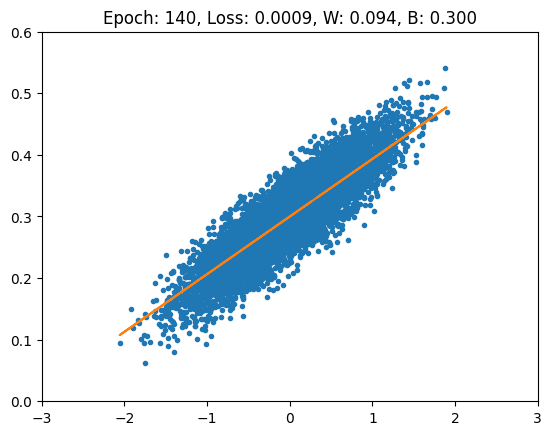

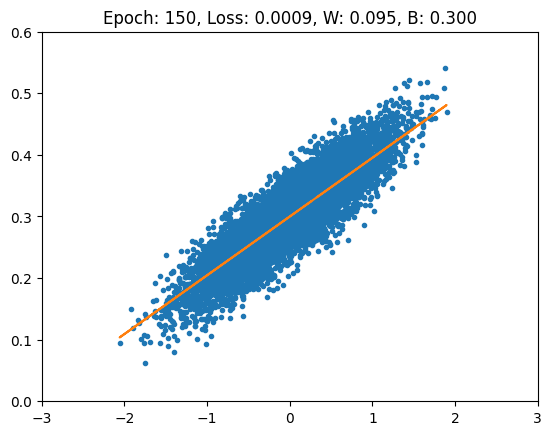

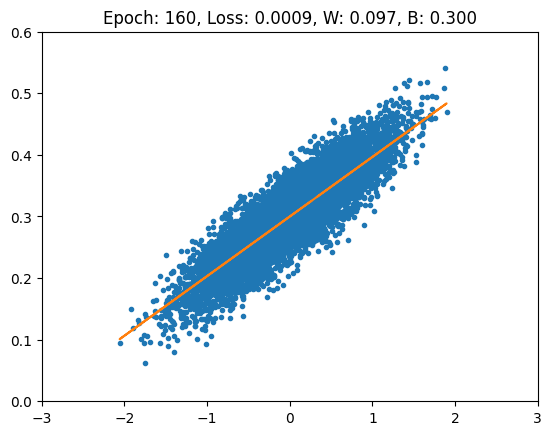

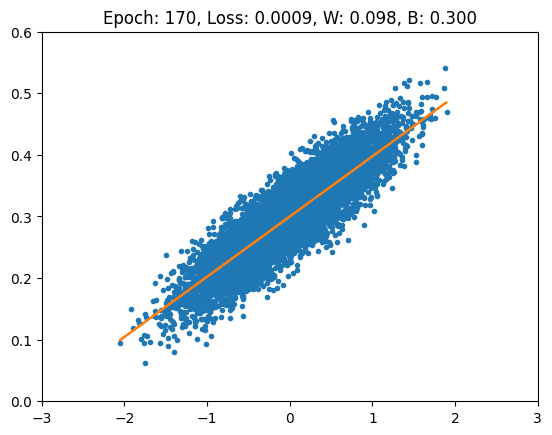

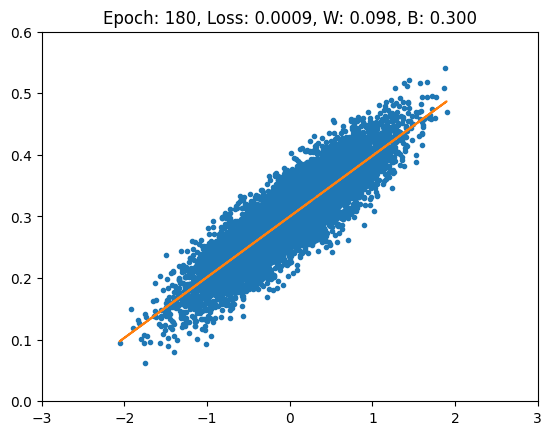

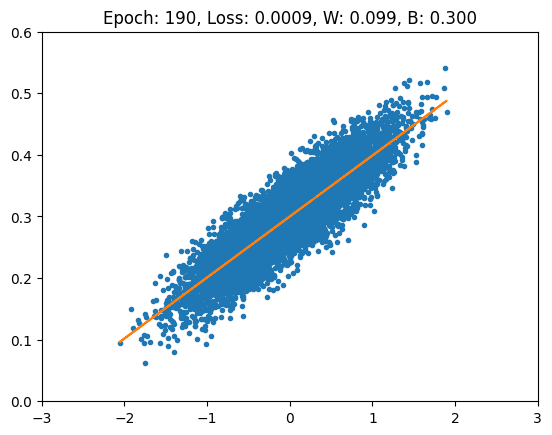

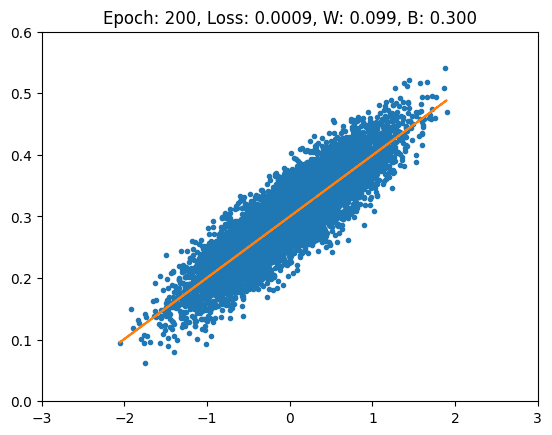

Model(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)

In [3]:
EPOCHS = 200
LEARNING_RATE = 0.05

criterion  = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=LEARNING_RATE)


# Training loop
for epoch in range(EPOCHS):
    y_pred = model.forward(x)

    loss = criterion(y_pred, y)

    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch == 0) or ((epoch+1) % 10 == 0):
        param = list(model.parameters())        
        y_pred = param[0].detach() * x + param[1].detach()
        plt.plot(x, y, ".")
        plt.plot(x, y_pred)
        plt.xlim(-3, 3)
        plt.ylim(0, 0.6)
        plt.title(f"Epoch: {epoch+1}, Loss: {loss.data.numpy():.4f}, W: {param[0].item():.3f}, B: {param[1].item():.3f}")
        plt.show()